In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [2]:
data_dir='/Users/pvb/Dropbox/Oceanografia/Data/Climatologias/EN.4.2.2.g10/NC/'

In [3]:
files = []
for iy in range(2000,2024):
    for im in range(1,13):
        files.append(data_dir+"EN.4.2.2.f.analysis.g10.%04d%02d.nc"%(iy,im))

In [4]:
data = xr.open_mfdataset(files)

In [5]:
data

<xarray.Dataset> Size: 30GB
Dimensions:                          (time: 288, depth: 42, lat: 173, lon: 360,
                                      bnds: 2)
Coordinates:
  * depth                            (depth) float32 168B 5.022 ... 5.35e+03
  * lat                              (lat) float32 692B -83.0 -82.0 ... 89.0
  * lon                              (lon) float32 1kB 1.0 2.0 ... 359.0 360.0
  * time                             (time) datetime64[ns] 2kB 2000-01-16T12:...
Dimensions without coordinates: bnds
Data variables:
    temperature                      (time, depth, lat, lon) float64 6GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    salinity                         (time, depth, lat, lon) float64 6GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    temperature_uncertainty          (time, depth, lat, lon) float64 6GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    salinity_uncertainty             (time, depth, lat, lon) float64 6GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    temperature_observation_weights  (time, depth, lat, lon) float32 3GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    salinity_observation_weights     (time, depth, lat, lon) float32 3GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    time_bnds                        (time, bnds) datetime64[ns] 5kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    depth_bnds                       (time, depth, bnds) float32 97kB dask.array<chunksize=(1, 42, 2), meta=np.ndarray>
Attributes: (12/22)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    institution:            UK Met Office
    contact:                Rachel Killick - rachel.killick@metoffice.gov.uk
    ...                     ...
    southernmost_latitude:  -90.5
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...

In [6]:
temperature=data.temperature.values-273
salinity=data.salinity.values
lon=data.lon.values
lat=data.lat.values
depth=data.depth.values
time = data.time.values

In [7]:
EN = xr.Dataset(
    data_vars=dict(
        temperature=(["time","depth","lat","lon"], temperature),
        salinity=(["time","depth","lat","lon"], salinity),
    ),
    coords=dict(
        lon=(["lon"], lon),
        lat=(["lat"], lat),
        depth=(["depth"], depth),
        time=time,
    ),
    attrs=dict(description="EN4"),
)

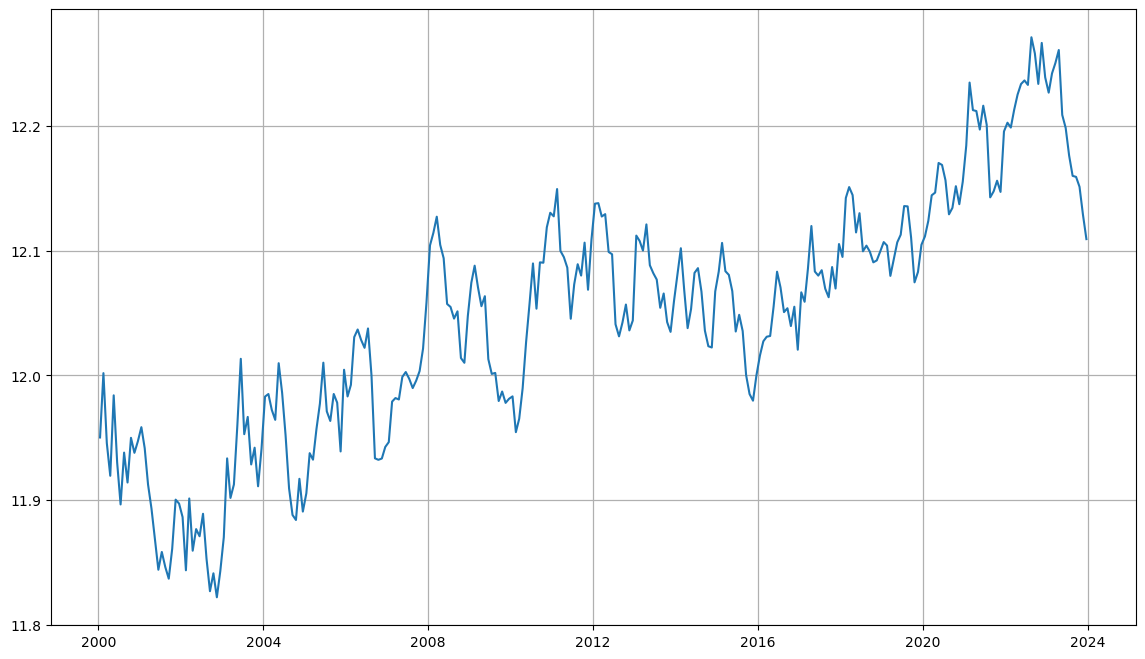

In [8]:
fig, ax = plt.subplots(1 , 1 , figsize = (14,8))
ax.plot(EN.time,
        EN.temperature.sel(lat=slice( -60, 60)).mean(dim='lat').mean(dim='lon').sel(depth=200,method="nearest"),
        label = '200')
ax.grid(linestyle='-', linewidth=.9);

In [11]:
EN.temperature

<xarray.DataArray 'temperature' (time: 288, depth: 42, lat: 173, lon: 360)> Size: 6GB
array([[[[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [-0.85663793, -0.8382338 , -0.83878562, ..., -0.89836297,
          -0.88587914, -0.87249861],
         [-0.91881559, -0.90130613, -0.89644096, ..., -0.93827353,
          -0.93229113, -0.92591259],
         [-1.03037462, -1.02463267, -1.02340982, ..., -1.03698478,
          -1.03512917, -1.0329071 ]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
...
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]]]])
Coordinates:
  * lon      (lon) float32 1kB 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
  * lat      (lat) float32 692B -83.0 -82.0 -81.0 -80.0 ... 86.0 87.0 88.0 89.0
  * depth    (depth) float32 168B 5.022 15.08 25.16 ... 5.051e+03 5.35e+03
  * time     (time) datetime64[ns] 2kB 2000-01-16T12:00:00 ... 2023-12-16T12:...

In [10]:
EN.to_netcdf('EN_Global_Jan2000_Dic2023.nc')